<a href="https://colab.research.google.com/github/Fairj19/ICD_IRIS/blob/main/ICD_3_5_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de librerías y carga del dataset:
Comenzaremos importando las librerías necesarias y cargando el dataset de Kaggle. En este caso, utilizaremos el conjunto de datos "Iris" que contiene información sobre las características de flores de diferentes especies.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Carga del dataset Iris de Kaggle
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

Preparación de los datos:
El dataset debe estar preparado para el entrenamiento del modelo. Esto implica separar las características (atributos) de las etiquetas (clases) y dividir el conjunto de datos en entrenamiento y prueba.

In [27]:
# Visualizacion del Dataframe
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# Estadistica Descriptiva del df
print(df.describe())

# Revision de nulls para evitarlos en el Df
print("\n", df.isnull().sum())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [58]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']
# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Entrenamiento del modelo:
Seleccionamos un algoritmo de Machine Learning, en este caso utilizaremos K-Nearest Neighbors (KNN). Creamos una instancia del algoritmo y lo entrenamos con el conjunto de datos de entrenamiento.

In [59]:
# Creación del modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
# Entrenamiento del modelo
knn.fit(X_train, y_train)

KNeighborsClassifier()

Evaluación del modelo:

In [60]:
# Predicciones sobre el conjunto de datos de prueba
y_pred = knn.predict(X_test)
# Cálculo de la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 1.0


Visualizaciones:

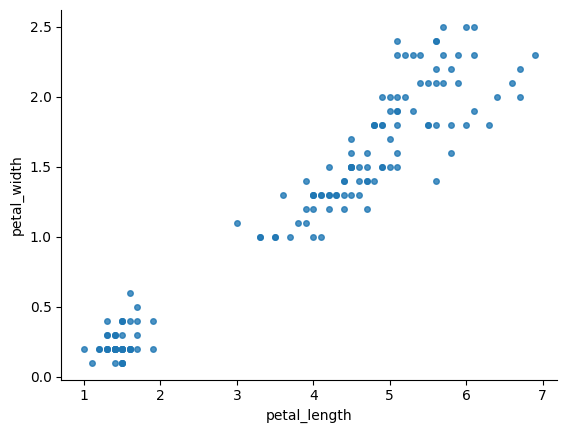

In [64]:
from matplotlib import pyplot as plt

# Relacion entre el largo y el ancho
df.plot(kind='scatter', x='petal_length', y='petal_width', s=16, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)